## Imports

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares,minimize
from scipy.integrate import simpson

## Constants

In [9]:
NA = 6.02214076E23  # Avogadro's number
Ntrue = 188 #Number of ions used
k = 1.0457  # units: kJ/mol/nm^2 - force constant being used in calculations
R = 8.31446261815324  # units: J/(mol*K) - ideal gas constant
T = 300  # units: K - temperature used for calculations
L_x, L_y, L_z = 4.8, 4.8, 14.4

## Extra info

In [10]:
# # Alirezza SI nm-based answers
# print(1.9247 / (conversion_factor ** (-0.5)))
# print(9.3393E-2 / (conversion_factor ** (-1)))
# print(3.4572E-2 / (conversion_factor **(-2)))

## Plotting initial concentration profiles

In [11]:
def compute_c_profile(xvg_file):
    """
    Computes a concentration profile from an XVG file by averaging symmetric parts of the profile.

    Parameters
    ----------
    xvg_file : str
        The path to the XVG file containing the number density data.
    
    Returns
    -------
    z_coords : numpy.ndarray
        The z-coordinates of the concentration profile.
    c_profile : numpy.ndarray
        The symmetric concentration profile.
    """
    z_coords, rho = np.loadtxt(xvg_file, comments=["@", "#"], unpack=True)
    # rho = rho / NA * 1E27 / 1000  # number density in mol/L
    print(len(z_coords))
    print(len(rho))
    mid_idx = int(len(rho) / 2 - 1)
    print(mid_idx)
    c_profile = 0.5 * (rho[:mid_idx + 1][::-1] + rho[mid_idx:-1])  # in mol/L
    z_coords = z_coords[:mid_idx + 1]  # in nm

    return z_coords, c_profile


In [12]:
z, c_original = compute_c_profile("density_hw_original_288.xvg")
z, c_1 = compute_c_profile("density_hw_r1_288.xvg")  # replicate 1
z, c_2 = compute_c_profile("density_hw_r2_288.xvg")  # replicate 2
z, c_3 = compute_c_profile("density_hw_r3_288.xvg")  # replicate 3


288
288
143
288
288
143
288
288
143
288
288
143


In [13]:
c_original

array([3.9746900e+00, 3.7962250e+00, 3.8204850e+00, 3.7918950e+00,
       3.8040250e+00, 3.8741950e+00, 3.7641700e+00, 3.7737050e+00,
       3.7199900e+00, 3.6065050e+00, 3.8005600e+00, 3.6272950e+00,
       3.5276650e+00, 3.5770500e+00, 3.5016750e+00, 3.5406600e+00,
       3.4895450e+00, 3.4271750e+00, 3.3162850e+00, 3.3344750e+00,
       3.2755650e+00, 3.2599700e+00, 3.1594800e+00, 3.0893050e+00,
       3.0693800e+00, 2.9957450e+00, 2.9273050e+00, 2.8735950e+00,
       2.8709950e+00, 2.7089900e+00, 2.6414150e+00, 2.5651800e+00,
       2.5417900e+00, 2.4179100e+00, 2.3044200e+00, 2.2784250e+00,
       2.2247200e+00, 2.2039250e+00, 2.0488550e+00, 2.0826400e+00,
       2.0020750e+00, 1.8859850e+00, 1.7621000e+00, 1.7205150e+00,
       1.6546800e+00, 1.6009650e+00, 1.5394550e+00, 1.5645800e+00,
       1.4450250e+00, 1.4147050e+00, 1.3324050e+00, 1.2267100e+00,
       1.2015900e+00, 1.0829025e+00, 1.0638465e+00, 1.0430530e+00,
       1.0032030e+00, 9.3649400e-01, 8.6459050e-01, 8.6459000e

In [14]:
# List concentration profiles
concentration_profiles = np.array([c_original,c_1,c_2,c_3])

### Normalizing Densities

Note from Dr Shirts: It is more rigorous to normalize the densities, since we know what the total number must be. 

Eq 13: $$ L_{x} L_{y} \int^{L_{z}/2}_{-L_{z}/2} C_{s}(z) dz = N_{s}$$

In [15]:
# Estimate the total number of ions, N_s (using Equation 13)

for c in concentration_profiles:
    N_s = L_x * L_y * simpson(c, z)
    print(N_s)  # this should compare to number of ions used (3m used 188)
    c /= (N_s/Ntrue)
    
# # verify normalization worked.
# for c in concentration_profiles:
#     N_s = L_x * L_y * simpson(c, z)
#     print(N_s)  # compare to number of ions used (3m used 188)
    

188.00496817343995
188.18428364160002
187.98510751343997
188.10112932479998


/tmp/ipykernel_198544/2072625792.py:4: DeprecationWarning: You are passing x=[0.025 0.075 0.125 0.175 0.225 0.275 0.325 0.375 0.425 0.475 0.525 0.575
 0.625 0.675 0.725 0.775 0.825 0.875 0.925 0.975 1.025 1.075 1.125 1.175
 1.225 1.275 1.325 1.375 1.425 1.475 1.525 1.575 1.625 1.675 1.725 1.775
 1.825 1.875 1.925 1.975 2.025 2.075 2.125 2.175 2.225 2.275 2.325 2.375
 2.425 2.475 2.525 2.575 2.625 2.675 2.725 2.775 2.825 2.875 2.925 2.975
 3.025 3.075 3.125 3.175 3.225 3.275 3.325 3.375 3.425 3.475 3.525 3.575
 3.625 3.675 3.725 3.775 3.825 3.875 3.925 3.975 4.025 4.075 4.125 4.175
 4.225 4.275 4.325 4.375 4.425 4.475 4.525 4.575 4.625 4.675 4.725 4.775
 4.825 4.875 4.925 4.975 5.025 5.075 5.125 5.175 5.225 5.275 5.325 5.375
 5.425 5.475 5.525 5.575 5.625 5.675 5.725 5.775 5.825 5.875 5.925 5.975
 6.025 6.075 6.125 6.175 6.225 6.275 6.325 6.375 6.425 6.475 6.525 6.575
 6.625 6.675 6.725 6.775 6.825 6.875 6.925 6.975 7.025 7.075 7.125 7.175] as a positional argument. Please change your i

Note BM: could maybe code up a funciton to check the above ^

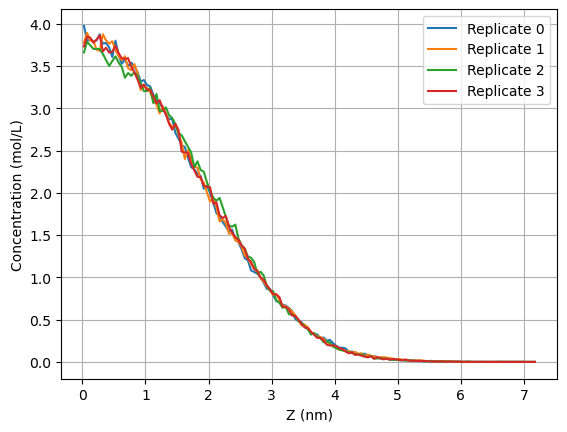

In [16]:
# Plot the concentration profiles (original and replicates)
plt.figure()
for i, c in enumerate(concentration_profiles):
    plt.plot(z, c, label="Replicate "+str(i))
plt.xlabel("Z (nm)")
plt.ylabel("Concentration (mol/L)")
plt.grid()
plt.legend()
plt.show()

## Calculating eq 12

$$ ln \left[ \frac{C_{s}(z)}{C_{max}} \right] + A \left[ \frac{C_{max}^{1/2}}{1+BC_{max}^{1/2}} - \frac{C_{s}(z)^{1/2}}{1+BC_{s}(z)^{1/2}} \right] + \sum^{i_{max}}_{i=1} \alpha_{i} [C_{s}(z)^{i} - C_{max}^{i}] = - \frac {U(z)}{RT}$$

In [17]:
def calc_y(theta, x):
    """
    Calculates -U(z) / RT using Equation 12.

    Parameters
    ----------
    theta : list
        A list containing the three parameters to be fit, including B, alpha_1, alpha_2.
    x : concentration list
    """
    A = 1.7964  # in M^(-1/2), value according to the SI

    # Converting the units for A so that they are nm-based
    conversion_factor = 1E24 / NA  # 1 nm^(-3) ~= 1.6605 M
    A /= (conversion_factor ** 0.5)

    C_max = np.max(x)
    term_1 = np.log(x / C_max)
    term_2 = -A * np.sqrt(x) / (1 + theta[0] * np.sqrt(x))
    term_3 = A * np.sqrt(C_max) / (1 + theta[0] * np.sqrt(C_max))
    term_4 = theta[1]* (x - C_max) 
    term_5 = theta[2] * (x ** 2 - C_max ** 2)
    y = term_1 + term_2 + term_3 + term_4 + term_5

    return y

def residuals(theta, x, y):
    return np.power(calc_y(theta, x) - y, 2)

In [18]:
#Use the direct average rather than over bootstrap means
mean_profile = np.mean(concentration_profiles,axis=0)
c_0 = mean_profile

# Removing 0 values from the concentration profile, and the corresponding z values
z_fit = z[c_0 != 0]
c_fit = c_0[c_0 != 0]

In [19]:
A = 1.7964  # in M^(-1/2), value according to the SI

# Converting the units for A so that they are nm-based
conversion_factor = 1E24 / NA  # 1 nm^(-3) ~= 1.6605 M
A /= (conversion_factor ** 0.5)

In [20]:
# Right side/ y of equation 12
y_values = -(0.5 * k * z_fit ** 2) * 1000 / (R * T) 

#Getting fit for full left side of eq 12
result_unweighted = least_squares(residuals, [4, 0.2, 0], args=(c_fit, y_values))

## Plotting unweighted results

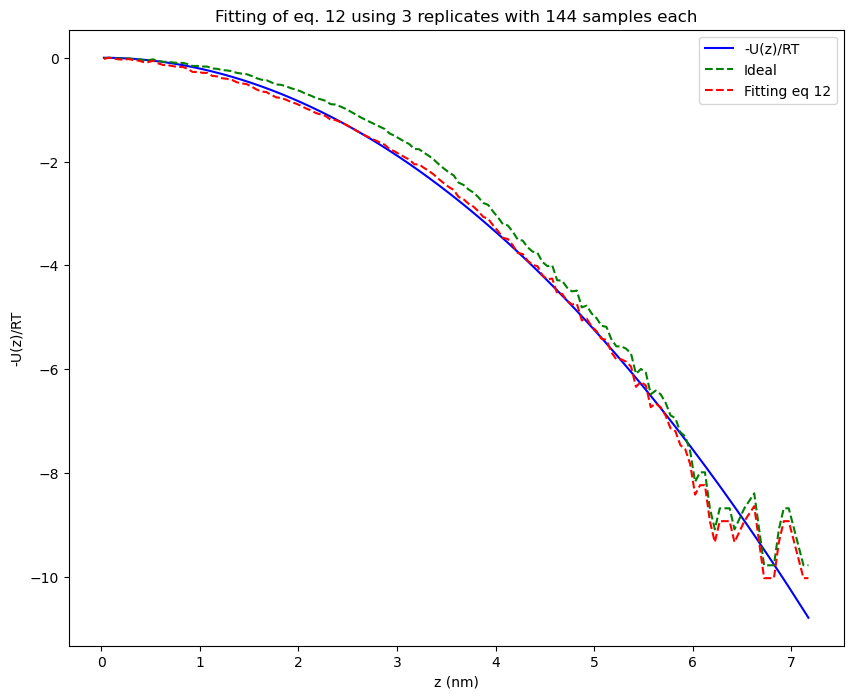

In [21]:
# plot the unweighted results
plt.figure(figsize = (10,8))
plt.plot(z_fit, y_values, 'b', label="-U(z)/RT")
plt.plot(z_fit, np.log(c_fit/np.max(c_fit)), 'g--', label="Ideal")
plt.plot(z_fit, calc_y(result_unweighted.x,c_fit), 'r--', label="Fitting eq 12")
plt.xlabel('z (nm)')
plt.ylabel('-U(z)/RT')
plt.title('Fitting of eq. 12 using 3 replicates with 144 samples each')
plt.legend()
plt.show()

We do see reasonably good fit - the idea curve (green line) is corrected to the be closer to the blue (red line is closer tothe blue line). However, we would also like to not fit the noise at the end. 

To do this, we do some error propagation to find the ideal weights for the least square fit. $C(z)/C_{max}$ is a probability, or at least proportional to a probability.  The uncertainty in a probability estimate $\hat{p}$ from a histogram (whose value with infinitely collected points would be $p$), can be shown to be $\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$, where $\hat{p}$ is the measured probability in that histogram bin, and $n$ is the total number of points collected over all bins.  But we are interested in the error of $\ln \hat{p}$. Generally the error in function $f$ of random variable $x$ $\delta f(x)$ is equal to $|f'(x)| \delta x$. So $\delta (\ln p) = \frac{\delta p}{p} = \sqrt{\frac{\hat{p}(1-\hat{p})}{n\hat{p}^2}}$.

For weighted least squares, it can be show that the weights should be proportional to 1/variance of the data point. The variance will be $(\delta\ln p)^2 = \frac{\hat{p}(1-\hat{p})}{n\hat{p}^2} = \frac{1-\hat{p}}{np}$.  The weights are only defined up to a constant, so we can just use $\frac{1-p}{p}$.  To do this, we have to normalize $C/C_{max}$, which is easy to do, we call it K. So the weights should be proportional to $\frac{C/K}{1-C/K} = \frac{C}{K-C}$.  So the most well defined points will get the most probability, the noisiest points the least.

## Find weights for least square fit

In [22]:
norm = N_s/(L_x*L_y)
print(norm)

8.164111515833333


In [23]:
def weighted_residuals(theta, x, y):
    return (x/(norm-x))*np.power(calc_y(theta, x) - y, 2)

In [24]:
#Getting fit for full left side of eq 12
result_weighted = least_squares(weighted_residuals, [4, 0.2,-0.01], args=(c_fit, y_values))

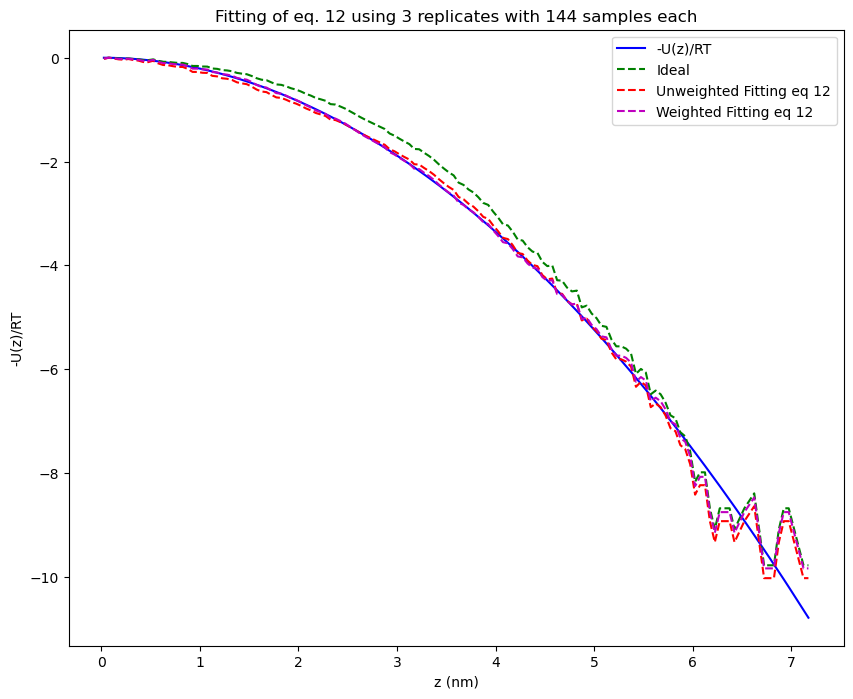

In [25]:
# plot the results
plt.figure(figsize = (10,8))
plt.plot(z_fit, y_values, 'b', label="-U(z)/RT")
plt.plot(z_fit, np.log(c_fit/np.max(c_fit)), 'g--', label="Ideal")
plt.plot(z_fit, calc_y(result_unweighted.x,c_fit), 'r--', label="Unweighted Fitting eq 12")
plt.plot(z_fit, calc_y(result_weighted.x,c_fit), 'm--', label="Weighted Fitting eq 12")
plt.xlabel('z (nm)')
plt.ylabel('-U(z)/RT')
plt.title('Fitting of eq. 12 using 3 replicates with 144 samples each')
plt.legend()
plt.show()

Hard to see what is going on, so let's look at differences

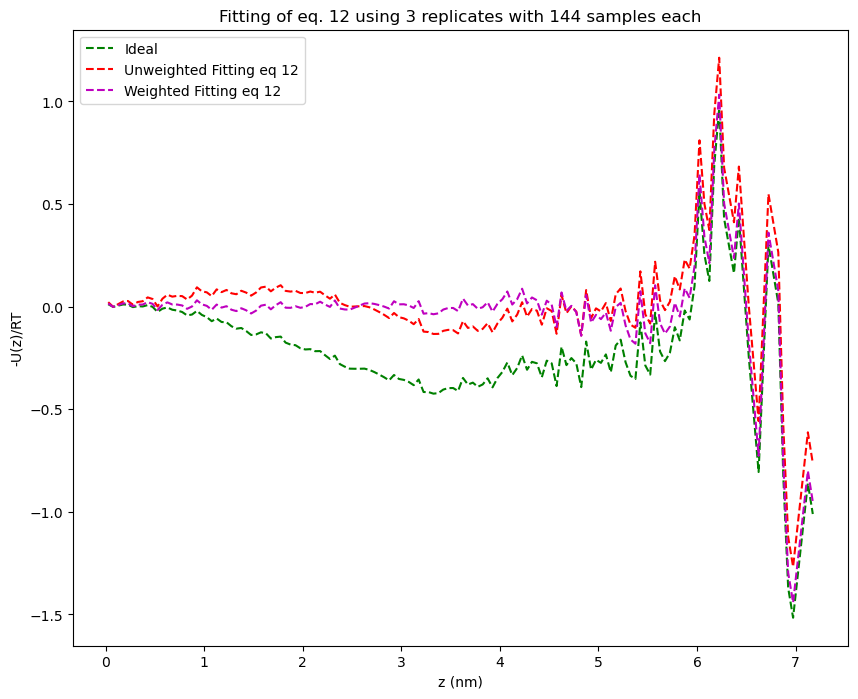

In [26]:
# plot the results. Notice the plots are now being subtracted from the y_values results
plt.figure(figsize = (10,8))
plt.plot(z_fit, y_values-np.log(c_fit/np.max(c_fit)), 'g--', label="Ideal")
plt.plot(z_fit, y_values-calc_y(result_unweighted.x,c_fit), 'r--', label="Unweighted Fitting eq 12")
plt.plot(z_fit, y_values-calc_y(result_weighted.x,c_fit), 'm--', label="Weighted Fitting eq 12")
plt.xlabel('z (nm)')
plt.ylabel('-U(z)/RT')
plt.title('Fitting of eq. 12 using 3 replicates with 144 samples each')
plt.legend()
plt.show()

The weighted fitting is much closer to zero over the range with reasonable concentrations, say z=5.

In [27]:
zlim = 4 #coordinate limit for where fitting is closer

In [28]:
#Stdev of unweighted results
np.std(y_values[z_fit<zlim]-calc_y(result_unweighted.x,c_fit[z_fit<zlim]))

0.07165057321394126

In [29]:
#Stdev of weighted results
np.std(y_values[z_fit<zlim]-calc_y(result_weighted.x,c_fit[z_fit<zlim]))

0.016195258842980963

Compare the distribution of the parameters with the fit!

In [30]:
print("B =", result_unweighted.x[0])
print("alpha1 =", result_unweighted.x[1])
print("alpha2 =", result_unweighted.x[2])

B = 6377.934608313355
alpha1 = -0.09873001271302291
alpha2 = 0.04266888931970931


In [31]:
print("B =", result_weighted.x[0])
print("alpha1 =", result_weighted.x[1])
print("alpha2 =", result_weighted.x[2])

B = 1.4401702068984517
alpha1 = 0.2889112082309906
alpha2 = -0.02401688257624252


And we expect that the parameters will be more consistent between runs with weighting.

## Bootstrapping Profiles (without and with weights)

In [32]:
trialp = [4, 0.1,0.0]

In [33]:
# Function to perform bootstrapping
def bootstrap_profiles(profiles, n_samples, res_func):
    bootstrap_params = []
    n_profiles = len(profiles)
    for _ in range(n_samples):
        # Resample with replacement
        bootstrap_sample = [profiles[np.random.randint(0, n_profiles)] for _ in range(n_profiles)]
        # Calculate mean profile
        mean_profile = np.mean(bootstrap_sample, axis=0)
        z_fit = z[mean_profile != 0]
        c_fit = mean_profile[mean_profile != 0] 
        y_values = -(0.5 * k * z_fit ** 2) * 1000 / (R * T)
        result = least_squares(res_func, trialp, args=(c_fit, y_values))
        bootstrap_params.append(result.x)
        
    return np.array(bootstrap_params) # list

Param 0 = 1518.4428029944836 +/- 4231.801114930156


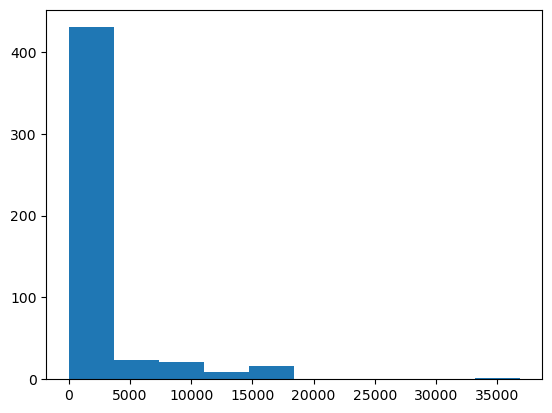

Param 1 = 0.40178508064237656 +/- 0.3805722485018365


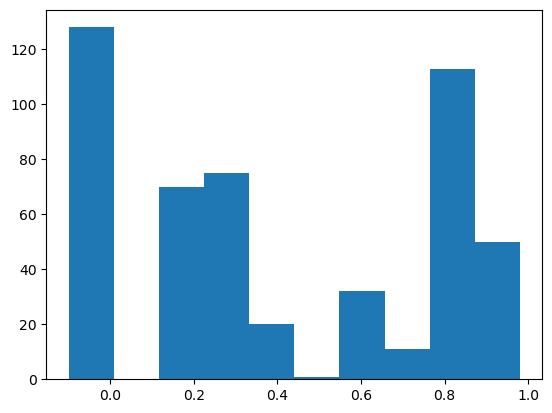

Param 2 = -0.024173351424651775 +/- 0.04518089062935859


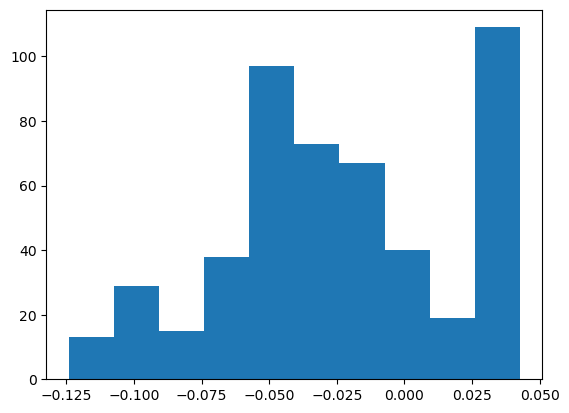

In [34]:
# Perform bootstrapping with unweighted fit
bootstrap_params_unweighted = bootstrap_profiles(profiles=concentration_profiles, n_samples=500, res_func=residuals)

for i in range(len(trialp)):
    pd = bootstrap_params_unweighted[:,i]
    std_param = np.std(pd) 
    mean_param = np.mean(pd)  # it's actually more accurate to
                             # just use the single fits, but we don't 
                             # necessarily know the name of that results structure
                             # when we are at this point in the code, use the mean for now
    print(f"Param {i} = {mean_param} +/- {std_param}")
    plt.hist(pd)
    plt.show()

Param 0 = 1.3703541696906831 +/- 0.6657602430588384


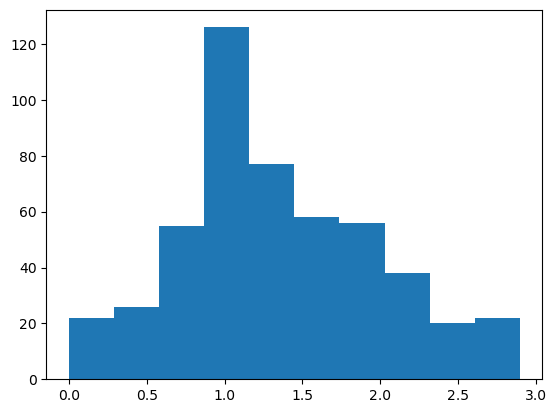

Param 1 = 0.35549855527911 +/- 0.13528871069240342


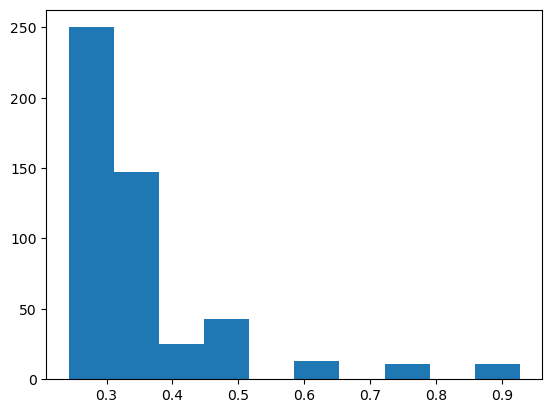

Param 2 = -0.031529865055908275 +/- 0.010503657492552722


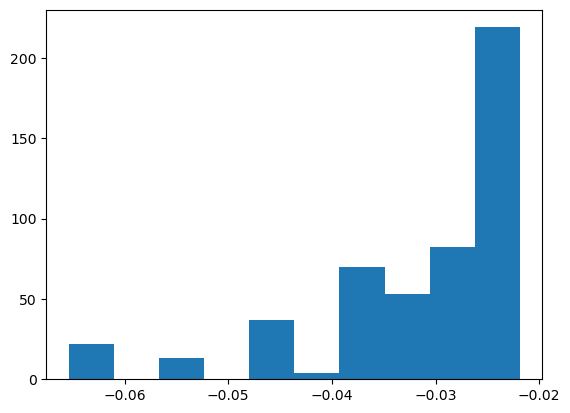

In [35]:
# Perform bootstrapping with weighted residuals
n_bootstrap = 500
bootstrap_params_weighted  = bootstrap_profiles(profiles=concentration_profiles, n_samples=500, res_func=weighted_residuals)

for i in range(len(trialp)):
    pd = bootstrap_params_weighted[:,i]
    std_param = np.std(pd) 
    mean_param = np.mean(pd)  # it's actually more accurate to
                             # just use the single fits, but we don't 
                             # necessarily know the name of that results structure
                             # when we are at this point in the code, use the mean for now
    print(f"Param {i} = {mean_param} +/- {std_param}")
    plt.hist(pd)
    plt.show()

Much more consistent performance!

## Maximum Likelihood Parameter Optimization

Now, we try maximum likelihood parameter optimization.  The basic idea is to express the probability of parameters given the data, $P(a|x)$, and using Bayes' rule to find that 

$P(a|x) = \frac{P(x|a)P(a)}{P(x)}$

We want to find the parameters 
$P(x)$ does not depend on the parameters. If we assume no prior information about the parameters $P(a)$ (that would be Bayesian inference), then we have.

$P(a|x) \propto P(x|a)$

So we need to maximize the probability given the data $P(\vec{x}|a)$. Assuming the samples are independent, then the total probability given all of the data is $\prod_{i=1}^N P(x_i|a)$.  

Since the logarithm is a monotonic function, then maximizing $\ln P(\vec{x}|a) = \sum_{i=1}^N \ln P(x_i|a)$ is the same as maximizing $P(\vec{x}|a$).

### The actual problem

We now apply the problem to the one of the chemical potential of ions trapped in a harmonic potential.

First, import the data.

In [36]:
import pickle
import pdb

In [37]:
with open('ion_array.bin', 'rb') as f:
    zs = pickle.load(f)

In [38]:
ionz = np.abs(np.array(zs)-72)/10 # rescale the data.

In [39]:
zvals = ionz.flatten()

In [41]:
print(len(zvals))

188376


For this problem, we are essentially finding the parameters that examine the probability of finding an ion at a given $x$, since concentration is proportional to probability.  

We convert the concentration $C(z)/C_{max}$ to an unnormalized probability $p(z)$.  

$\ln p(z|B,\alpha_1,\alpha_2) \propto \ln \frac{C(z)}{C_{max}}$

$\ln \frac{C(z)}{C_{max}} = \sum_i -\frac{kz^2}{2RT} + A\left(\frac{C(z)^{1/2}}{1+BC(z)^{1/2}} - \frac{C_{max}^{1/2}}{1+BC_{max}^{1/2}} \right) -\alpha_1(C(z)-C_{max}) - \alpha_2(C(z)^2-C_{max}^2)$  



$C_{max}$ and also the normalizing constant will be fixed by the fact that we have a fixed number of ions present.

This is actually not ideal for maximizing, since the concentration $c(z)$ occurs on both sides. It would be great if we could algebraically solve for $c(z)$, but this does not appear to be possible.

We can't actually leave out any of the terms, because all of the terms involve the parameters implicitly (including $C_{max}$).

We approach the problem the following way:

 - Given a set $[B,\alpha_1,\alpha_2]$, find the concentration $C(z|B,\alpha_1,\alpha_2)$ that satisfies those parameters. 
 - This will need to be done self-consistently, as each time the parameters change, $C_{max}$ will also change.
 - We will make use of a reference ideal distribution with no parameters.


Define the ideal solution function which satisfies the normalization and find the $C_{max}$ for this solution, i.e. 

$N_p = L_x L_y C_{max} \int_0^{\infty} p(z|B,\alpha_1,\alpha_2) dz$

$C_{max} = \frac{ N_p }{L_x L_y} \left(\int_0^{\infty} p(z|B,\alpha_1,\alpha_2\right) dz )^{-1}$

In [32]:
from scipy.integrate import quad, simpson, trapezoid

In [33]:
red_U_app = lambda z: 1000*k*z*z/(2*R*T) #left side of eq 12
cz_ideal = lambda z: np.exp(-red_U_app(z)) 

#Should not hard code k

In [34]:
ideal_norm = quad(cz_ideal,0,10)[0]
print(ideal_norm)
ideal_norm = np.sqrt(np.pi*R*T/(2*1000*k))
print(ideal_norm)

#are we checking these both yield approx the same?
#where did the second equation come from? Why pi?

1.9356824136314768
1.9356824138152555


In [35]:
cmax_ideal=N_s/(L_x*L_y*ideal_norm)
print(cmax_ideal)

#same as cell above?

4.217691630385669


One issue is doing the integration of the model parameter to normalize it. 

We could try to take advantage of importance sampling - if we have two unnormalized probability distributions $q_i$ and $q_j$ ($p_i$ normalized), and we have samples from $q_i$, then we can have

$1 = \int p_j(z) dz \\
= \int \frac{p_j(z)}{p_i(z)}p_i(z) \\
= \int \frac{q_j(z)/Z_j}{q_i(z)/Z_i} p_i(z) \\
= \int \frac{Z_i}{Z_j} \frac{q_j(z)}{q_i(z)} p_i(z) \\
\approx \frac{Z_i}{Z_j} \frac{1}{N} \sum_n \frac{q_j(z_n)}{q_i(z_n)} \\
\frac{Z_i}{Z_j} \approx \frac{1}{N} \sum_n \frac{q_j(z_n)}{q_i(z_n)}
$

 So if we know the ideal solution normalizing factor, we can find

$Z_{trial} = Z_{ideal} \frac{1}{N} \sum_n \frac{q_{ideal}(z)}{q_{trial}(z)} =  Z_{ideal} \left \langle \frac{q_{ideal}(z)}{q_{trial}(z)} \right \rangle$

However, this doesn't actually appear work if we using this equation to optimize the parameters, because if we have a mismatch between the trial function and the data sampled; if the trial function functional form doesn't actually match the PDF measured, then we will continually get worse results.

Let's do something silly/simple and assume we have enough data, and just take the points that are output, and do Simpson's rule on those.

In [36]:
# define a function that iterates the calculation of a concentration.
def czfunc(a,z,cz):
    # exponential of eq 12 for ln c/cmax for the data points
    cznew = np.exp(logprobfunc(a,z,cz))
    # these indices do not need to be repeated if this is expensive,
    # but if we bootstrap, they will change, so keep for now. 
    zunique,locs = np.unique(z,return_index=True)
    # now we have sorted unique points, we can integrate
    newarea = simpson(cznew[locs],zunique)
    cznorm_ratio = ideal_norm/newarea
    return (cmax_ideal*cznorm_ratio)*cznew

In [37]:
def logprobfunc(a,z,cz,A=A):
    # we need to calculate the maximum concentration 
    cmax = np.max(cz) # this only works if a sample is at z=0: improve!                      
    czh = np.sqrt(cz)
    cmaxh = np.sqrt(cmax)
    term_1 = -red_U_app(z)
    term_2 = A*((czh/(1+a[0]*czh))-(cmaxh/(1+a[0]*cmaxh)))
    term_3 = - a[1]*(cz - cmax)
    term_4 = - a[2]*(cz**2 - cmax**2)
    return term_1 + term_2 + term_3 + term_4

In [38]:
def converge_c(params, z, cz_start,
               niter=1000,lim=0.0001,verbose=False):

    # hot start from ideal, otherwise use a good guess.
    if isinstance(cz_start,str):
        if cz_start == 'ideal':
            cz_start = cmax_ideal*cz_ideal(z)
            
    c_old = cz_start
    for i in range(niter):
        c_new = czfunc(params,z,c_old)
        norm = np.sqrt(np.dot(c_new-c_old,c_new-c_old))
        if verbose:
            print(i,norm)
        c_old = c_new
        if norm < lim:
            break

    return czfunc(params,z,c_new)

How many duplicates of each $z$ value are there?  

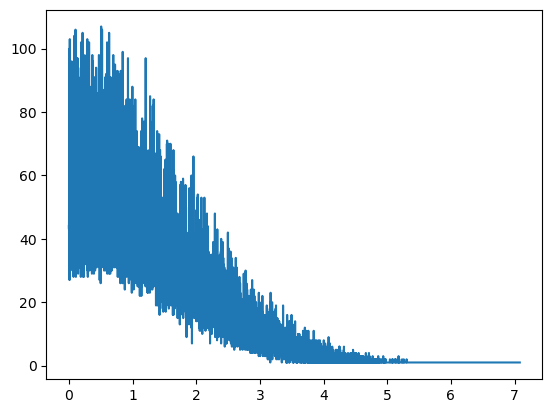

In [39]:
zsparse,zcount=np.unique(zvals,return_counts=True)
plt.plot(zsparse,zcount)
plt.show()

Turns out, quite a few!  We can take advantage of that; each time the same $z$ is processed, it would result in the same number, so we can calculate the contribution for each $z$ once and then mulitply by the number of times it appears.

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


0 76.465454
1 8.332717
2 1.4050564
3 0.2554271
4 0.048729192
5 0.009494622
6 0.0018640882
7 0.0005749904


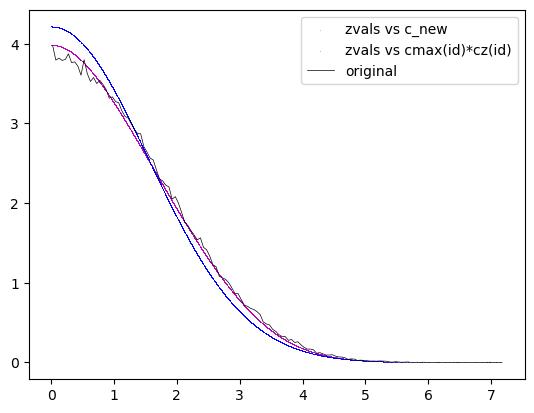

In [40]:
newp = np.array([1.35,0.33,-0.04])
c_new = converge_c(newp,zvals,cz_start='ideal',lim=0.001,verbose=True)
plt.scatter(zvals,c_new,s=0.1,lw=0.1,c='m', label='zvals vs c_new')
plt.scatter(zvals,cmax_ideal*cz_ideal(zvals),s=0.1,lw=0.1,c='b', label='zvals vs cmax(id)*cz(id)')
plt.plot(z,concentration_profiles[0],'k',lw=0.5, label='original')
plt.legend()
plt.show()

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


0 13.363265
1 1.5529866
2 0.2644794
3 0.048479162
4 0.009297261
5 0.0018273339
6 0.00036675524


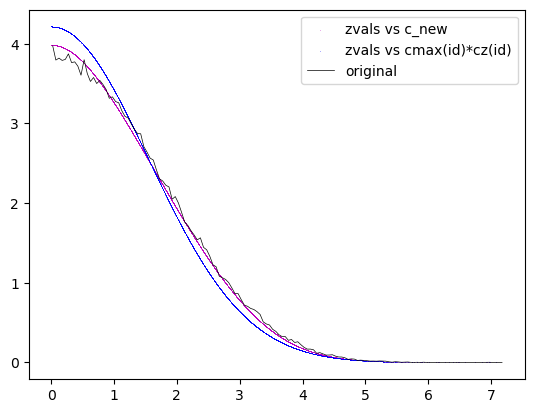

In [41]:
# we can converge faster with sparse data. (?)
newp = np.array([1.35,0.33,-0.04])
zsparse,zcount=np.unique(zvals,return_counts=True)
c_new_sparse = converge_c(newp,zsparse,cz_start='ideal',lim=0.001,verbose=True)
plt.scatter(zsparse,c_new_sparse,s=0.1,lw=0.1,c='m', label='zvals vs c_new')
plt.scatter(zsparse,cmax_ideal*cz_ideal(zsparse),s=0.1,lw=0.1,c='b', label='zvals vs cmax(id)*cz(id)')
plt.plot(z,concentration_profiles[0],'k',lw=0.5, label='original')
plt.legend()
plt.show()

In [42]:
def neglliter(a,z,cz_start,counts=None,lim=0.0001,verbose=False,print_val=False,doeval=False):
    if len(z)!= len(cz_start):
        print("x and y data does not match length")
        return
    if doeval == True:
        lim = 1
    # generate the new concentration with these parameters
    cz = converge_c(a,z,cz_start,lim=lim,verbose=verbose)
    # divide by cmax_ideal to make the numbers smaller, 
    # it's a constant so it doesn't affect the results     
    terms = np.log(cz/cmax_ideal)
    # if we don't know how many of each value there are,
    # just add them all up
    if counts is None:
        csum = np.sum(terms)
    else:
        # if we DO know how many of each value there are
        # then just do each value once, and multiply
        # by the number of counts
        csum = np.dot(counts,terms)
    if print_val:
        print("csum",csum)
    return -1*csum

In [43]:
from timeit import default_timer as timer

In [44]:
# summing over all the values is slow
start = timer()
results = minimize(neglliter,newp,args=(zvals,c_new),method='Nelder-Mead',options={'maxiter':200})
# this one also works pretty well
#results = minimize(neglliter,newp,args=(zvals,c_new),method='COBYLA',options={'rhobeg':0.001})
end = timer()
print(end-start)

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


281.7890482250368


In [45]:
# plot the results
print(results)
c_opt = converge_c(results.x,zvals,cz_start=c_new,lim=0.0001,verbose=False)
optp = results.x
print(optp)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 105705.28125
             x: [ 1.426e+00  3.141e-01 -3.308e-02]
           nit: 62
          nfev: 160
 final_simplex: (array([[ 1.426e+00,  3.141e-01, -3.308e-02],
                       [ 1.426e+00,  3.141e-01, -3.308e-02],
                       [ 1.426e+00,  3.141e-01, -3.308e-02],
                       [ 1.426e+00,  3.141e-01, -3.308e-02]]), array([ 1.057e+05,  1.057e+05,  1.057e+05,  1.057e+05]))


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


[ 1.42571846  0.31406065 -0.03308496]


In [46]:
# yep, we have reduced the negative log likelihood, 
# i.e. maximized the likelihood
print(neglliter(newp,zvals,c_new,doeval=True))
print(neglliter(optp,zvals,c_opt,doeval=True))

105752.1640625
105705.3671875


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


See what the improved solution looks like! (red line vs magenta line)

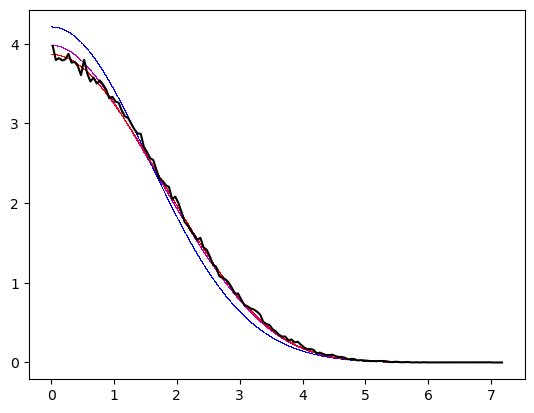

In [47]:
plt.scatter(zvals,c_new,s=0.1,lw=0.1,c='m')
plt.plot(z,concentration_profiles[0],'k')
plt.scatter(zvals,cmax_ideal*cz_ideal(zvals),s=0.1,lw=0.1,c='b')
plt.scatter(zvals,c_opt,s=0.1,lw=0.1,c='r')
plt.show()

Note we can make this much faster by noting that there are a lot of repeats of each value, so we can simplify the sum (MIGHT be slightly different because of rounding).


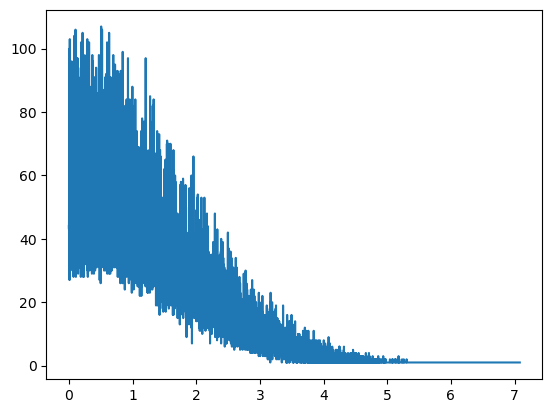

In [48]:
zsparse,zcount=np.unique(zvals,return_counts=True)
plt.plot(zsparse,zcount)
plt.show()

In [49]:
# this is now much faster, and gives essentially the same answer.
start = timer()
results = minimize(neglliter,newp,args=(zsparse,c_new_sparse,zcount),method='Nelder-Mead')
end = timer()
print("time=",end-start)
print(results)
full_opt = results.x

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


time= 1.148791381972842
       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 105705.11869853735
             x: [ 1.432e+00  3.149e-01 -3.333e-02]
           nit: 76
          nfev: 175
 final_simplex: (array([[ 1.432e+00,  3.149e-01, -3.333e-02],
                       [ 1.432e+00,  3.149e-01, -3.333e-02],
                       [ 1.432e+00,  3.149e-01, -3.333e-02],
                       [ 1.432e+00,  3.149e-01, -3.333e-02]]), array([ 1.057e+05,  1.057e+05,  1.057e+05,  1.057e+05]))


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


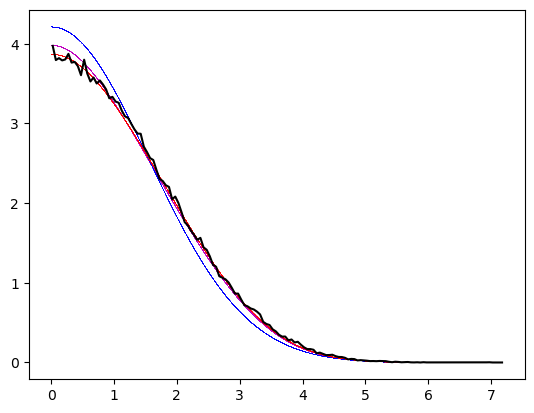

In [50]:
# now plot the new data 
c_opt_sparse = converge_c(results.x,zsparse,cz_start=c_new_sparse,verbose=False)
plt.scatter(zsparse,c_new_sparse,s=0.1,lw=0.1,c='m')
plt.plot(z,concentration_profiles[0],'k')
plt.scatter(zsparse,cmax_ideal*cz_ideal(zsparse),s=0.1,lw=0.1,c='b')
plt.scatter(zsparse,c_opt_sparse,s=0.1,lw=0.1,c='r')
plt.show()

Note that the parameters are somewhat different, but the curves are about the same; the space appears to be relatively degenerate, in that there's a large volume of parameters that all give similar results. But that's probably OK for osmotic coefficients, as there will also be many parameters that thus give about the same osmotic coefficient. 

This seems to work!  Things to do:

1. Implement bootstrapping. A key here is one can now bootstrap over all the SAMPLES (like 188,000), not the profiles (4).
2. See what happens when you use all the data from the trajectories.  You can just dump them all into one big array - the bootstrapping is on samples, not on the trajectories.
3. See if you can get away with 2 paramters, not 3, and still get a good fit.  
4. Bootstrap around the osmotic coefficient/pressure calculation given the curve - this will be much less noisy than the parameters themselves. 


In [51]:
# Function to perform bootstrapping over _samples_
def bootstrap_samples(samples, n_boot, minfunc, init_params):
    zinit=np.unique(samples)
    c_start = converge_c(init_params,zinit,cz_start='ideal',verbose=False)
    bootstrap_params = list()
    bootstrap_cs = list()
    n_samples = len(samples)
    for i in range(n_boot):
        # Resample with replacement
        indices = np.random.randint(0,n_samples,size=n_samples)
        bootstrap_sample = samples[indices]
        zsparse,zcount=np.unique(bootstrap_sample,return_counts=True)
        # we can't use the old concentrations since they are at potentially different z
        # so interpolate (should be negligible error)
        c_new = np.interp(zsparse,zinit,c_start)
        result = minimize(minfunc,init_params,args=(zsparse,c_new,zcount),method="Nelder-Mead")
        print(i,result.x,result.fun)
        bootstrap_params.append(result.x)
        # generate a converged concentration at this point. Make the locations
        # at the same points as the original
        c_new = converge_c(result.x,zsparse,cz_start=c_new)
        c_new = np.interp(zinit,zsparse,c_new)
        bootstrap_cs.append(c_new) 
    return np.array(bootstrap_params), np.array(bootstrap_cs)

In [52]:
bparams,bcs = bootstrap_samples(zvals,500,neglliter,results.x)

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9740000e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)
/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9730005e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


0 [ 2.51947682  0.21532104 -0.01962374] 105358.46101194229
1 [ 1.99841963  0.26596299 -0.02695288] 106011.91641331615


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9429998e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


2 [ 2.11900897  0.24528249 -0.02362257] 105647.03323837878


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9730005e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


3 [ 2.07759993  0.2352931  -0.02177066] 105312.81895456775
4 [ 3.21063545  0.17504428 -0.01239678] 105538.41885664739


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9730005e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


5 [ 2.94707782  0.18604682 -0.01360207] 105813.91196675817
6 [ 3.30825748  0.19903605 -0.0186391 ] 105424.95641953158


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


7 [ 3.47816554  0.1779947  -0.01443192] 105300.70053723354
8 [ 2.38491148  0.23631674 -0.02339009] 105670.05809958238
9 [ 2.8653796   0.20889378 -0.01921385] 105594.71687833878
10 [ 3.23973926  0.1992554  -0.0187552 ] 105326.77964327433
11 [ 2.82577009  0.22125654 -0.02238472] 105405.93978913255
12 [ 2.48459465  0.22278799 -0.0205425 ] 105679.2471266094


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


13 [ 2.48869221  0.23120923 -0.02262168] 105642.29966508935
14 [ 2.67919572  0.20171884 -0.01662929] 105658.80656546744
15 [ 2.76669647  0.20624614 -0.01786963] 105739.68983977308
16 [ 2.66005115  0.22761297 -0.02249075] 105783.03534139594


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


17 [ 2.39198405  0.24802316 -0.0254311 ] 105952.22575802387


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


18 [ 2.12480637  0.22009018 -0.01833486] 105380.86527251972


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


19 [ 2.3182327   0.23673216 -0.02336258] 105414.02805413071
20 [ 2.70041682  0.21242904 -0.01887877] 105802.28751343794


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


21 [ 2.68106307  0.20922208 -0.01790477] 105838.03485424563


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


22 [ 3.13265866  0.19990963 -0.01784462] 105667.00498472601
23 [ 1.86253921  0.25790624 -0.02556659] 105189.32139855988
24 [ 2.45435538  0.2193619  -0.0200381 ] 105480.33178597511
25 [ 2.3278261   0.21016979 -0.01754019] 105241.52974555003
26 [ 1.84534754  0.27677697 -0.02903059] 105591.7053174561
27 [ 2.50994108  0.21887618 -0.01927695] 105875.41468823703
28 [ 3.18423321  0.19883839 -0.01786529] 105647.81139451814


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4700012e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


29 [ 2.28729137  0.23550527 -0.02211676] 105801.31331447593
30 [ 2.98207933  0.19504581 -0.01549072] 105963.90729934006


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


31 [ 3.0175905   0.21500033 -0.0209459 ] 105687.91135995707
32 [ 1.99590397  0.25469275 -0.02402815] 106028.13579548878


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


33 [ 2.33772081  0.22722988 -0.02076294] 105699.23443127057
34 [ 2.94348552  0.20152249 -0.01747836] 105692.40659460751
35 [ 2.35716423  0.22152929 -0.01935859] 105820.20012957939
36 [ 1.89971717  0.24951112 -0.02269706] 105726.64172164153


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


37 [ 1.8849779   0.26564049 -0.02568624] 106050.73581188815
38 [ 3.10485838  0.17376549 -0.01201593] 105425.60061349795
39 [ 2.22851634  0.24133734 -0.02343002] 105688.63050578466
40 [ 2.40416539  0.24057068 -0.02382546] 105951.71671349563


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


41 [ 3.4483494  0.1960099 -0.0179676] 105608.02971590516
42 [ 2.42765635  0.23286726 -0.02229215] 105840.73570835617
43 [ 2.51625265  0.25295275 -0.02840153] 105430.6673959461
44 [ 2.64466748  0.21909    -0.02042497] 105670.68814469663
45 [ 2.46421259  0.21947153 -0.02038288] 105340.96238383367


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


46 [ 3.66000323  0.17477421 -0.01254851] 106013.38886390124
47 [ 3.02121181  0.19163621 -0.01461074] 106078.74456607085


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


48 [ 2.80343595  0.21832727 -0.02119976] 105622.61917159025
49 [ 2.2257624   0.22878258 -0.02030839] 105749.24614805458


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


50 [ 3.33173235  0.16280504 -0.01021733] 105350.00349145551
51 [ 2.45892198  0.22745325 -0.02115348] 105876.57123686792
52 [ 2.67184988  0.21396319 -0.01884698] 105914.71663920129


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


53 [ 2.87949552  0.20541735 -0.01876085] 105407.69915787084
54 [ 2.41586733  0.22005804 -0.02004901] 105454.08806513774
55 [ 2.55430988  0.22670784 -0.02057607] 106231.44865058929
56 [ 1.65743138  0.29999574 -0.03222749] 105693.61851231856


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


57 [ 3.2379276   0.20088165 -0.01770184] 105967.69049234981
58 [ 2.16620886  0.24396249 -0.02347528] 105758.96004265144


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


59 [ 3.16654026  0.19445977 -0.01746631] 105287.50072338927
60 [ 2.36317799  0.23409113 -0.02197809] 105939.03187016131
61 [ 2.34930202  0.23661131 -0.02280567] 105829.04223601965
62 [ 2.03205554  0.24984161 -0.0246097 ] 105420.10894177461


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


63 [ 2.5117498   0.22092303 -0.02013653] 105706.61513892186


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


64 [ 3.35983312  0.2046701  -0.01898194] 106002.34504814175


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9429998e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


65 [ 2.87890029  0.20822133 -0.01843707] 105862.08891353552
66 [ 2.16941712  0.26404011 -0.02793996] 105921.09046714853
67 [ 2.92027016  0.20726483 -0.01837311] 105879.23775639277
68 [ 2.31903644  0.2234946  -0.02024647] 105416.13252278957
69 [ 3.23295163  0.20434385 -0.01857622] 105969.77248389326
70 [ 2.05778305  0.25537668 -0.02533848] 105776.02735120179
71 [ 3.23625977  0.20072952 -0.01734728] 106109.33704957331
72 [ 2.05007295  0.26116693 -0.02718984] 105503.13251271621


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


73 [ 2.56602013  0.22946378 -0.02177769] 105991.40932049921
74 [ 3.29681405  0.1856156  -0.01441678] 105894.4070858341


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


75 [ 2.42619875  0.21486464 -0.01859575] 105554.98703636751


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9429998e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


76 [ 2.03689159  0.24700683 -0.02347952] 105660.09318428909
77 [ 1.96937074  0.25727837 -0.02561287] 105538.66514936468


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


78 [ 3.3417332   0.18017341 -0.01356157] 105719.85678055769


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.9129996e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


79 [ 2.2782741   0.22939495 -0.02240875] 104988.16038058515
80 [ 2.87053776  0.20543444 -0.01658804] 106403.89127279317
81 [ 3.18426849  0.17981139 -0.01374828] 105420.06881576187
82 [ 2.70916211  0.21707981 -0.02052153] 105589.19429900579
83 [ 2.41993044  0.21207467 -0.01857946] 105236.36264451839
84 [ 2.08980632  0.25643775 -0.02580625] 105780.90868019614
85 [ 2.53117496  0.2157044  -0.01898554] 105716.75588875297
86 [ 2.27579285  0.23476244 -0.02310351] 105232.34002426351
87 [ 2.21516407  0.23915309 -0.02242779] 105866.40738782483
88 [ 2.48776777  0.21797799 -0.01850239] 106080.44021121599
89 [ 2.22200567  0.24160283 -0.02331466] 105707.70963583859
90 [ 2.0311456   0.24512307 -0.02252987] 105797.36854650025
91 [ 2.87599786  0.20313575 -0.01763594] 105680.6784905796


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


92 [ 2.32632775  0.23103048 -0.02073881] 106023.09916123628
93 [ 2.75842201  0.1887503  -0.01339423] 105814.54405140088


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


94 [ 2.94168297  0.20555922 -0.01781879] 105997.8014055893
95 [ 2.05209197  0.25347691 -0.02500705] 105698.1065920173
96 [ 2.70710763  0.2158003  -0.01843864] 106401.16185078726
97 [ 2.04546024  0.27911957 -0.03053848] 105917.8465823064


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


98 [ 2.59804881  0.22371405 -0.02147354] 105602.76553316592
99 [ 2.79498003  0.23499252 -0.02358853] 106310.39896029272
100 [ 2.78890599  0.21835588 -0.01961116] 106280.42697340366
101 [ 2.73180096  0.22357363 -0.02033656] 106404.87231895888
102 [ 2.79641628  0.20190155 -0.01697979] 105735.57672303665
103 [ 2.17469724  0.24486842 -0.02361252] 105814.5454889615
104 [ 2.49783344  0.2197296  -0.01991119] 105673.96375368297
105 [ 2.57483979  0.22427818 -0.02130257] 105666.17374551398
106 [ 2.41045265  0.22001038 -0.01935327] 105745.42651325835
107 [ 2.18722595  0.25873349 -0.02694282] 105822.35917727546
108 [ 2.57047457  0.21064007 -0.01780898] 105841.83461254222
109 [ 2.67992127  0.2185256  -0.02069972] 105591.07881709676
110 [ 2.48972544  0.2268242  -0.02149837] 105684.87590558057
111 [ 2.0752519   0.25272578 -0.02436284] 105955.2183487723


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.7459998e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


112 [ 2.25435076  0.24870458 -0.02429662] 106140.26020395865
113 [ 2.44691547  0.21701375 -0.01842804] 105874.06338386882
114 [ 3.38280481  0.19744196 -0.01762591] 105846.3603485673
115 [ 2.22791405  0.24391798 -0.0245896 ] 105428.50987794205
116 [ 2.59201683  0.20839691 -0.01847813] 105312.77771723006


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


117 [ 1.71283227  0.25932956 -0.02492414] 104889.27427766986
118 [ 2.3521473   0.23423144 -0.02143465] 106175.50603490746
119 [ 2.39662249  0.21818571 -0.01973743] 105296.54602560276
120 [ 2.55378962  0.22016465 -0.02041731] 105665.63090000211
121 [ 2.12751373  0.23689494 -0.02120259] 105901.8972370134
122 [ 2.56161748  0.23572272 -0.02359272] 105865.82013263114
123 [ 3.35931797  0.18666572 -0.01564172] 105540.6507451039
124 [ 2.5216025   0.22839692 -0.02255898] 105509.76691472525
125 [ 2.2692812   0.24259093 -0.02391399] 105711.1647125828
126 [ 2.07020127  0.24709283 -0.02332376] 105828.39028064256
127 [ 2.70881999  0.2071023  -0.01810259] 105583.16630418207
128 [ 2.78075176  0.1958607  -0.01598958] 105486.34370298982
129 [ 3.44447472  0.19621938 -0.01724046] 105945.85047439804
130 [ 2.3349394   0.24281661 -0.02534765] 105257.08848887384
131 [ 2.12111616  0.26969743 -0.02797082] 106360.36413976204
132 [ 2.46918669  0.22130492 -0.02041495] 105591.33167062358
133 [ 1.91762018  0.2710133

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


161 [ 2.52657556  0.23064639 -0.02230397] 105814.16478512621
162 [ 3.23365319  0.20894418 -0.01973529] 105930.83218630479


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9429998e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


163 [ 1.78309556  0.26921316 -0.02630792] 105692.11547745913
164 [ 3.01874555  0.18032469 -0.01229221] 105851.66607597454
165 [ 2.61242366  0.24470788 -0.02601321] 105817.9102849809
166 [ 2.32377865  0.21414319 -0.01749608] 105702.37789417643
167 [ 2.08655693  0.23632951 -0.02186016] 105366.68148626162
168 [ 2.0429952   0.25666106 -0.02572153] 105704.30510335145
169 [ 2.46936801  0.23253072 -0.02300489] 105624.4236283244
170 [ 1.84312834  0.27278585 -0.02723228] 105950.108805109
171 [ 2.71861963  0.19903325 -0.01535496] 106008.91896179032


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


172 [ 3.29224574  0.1938605  -0.01621947] 105926.32840743432
173 [ 2.54983003  0.22207004 -0.02025649] 105881.53901490032
174 [ 2.48723304  0.22815462 -0.02129515] 105952.86288933629
175 [ 2.57060022  0.21406408 -0.01974446] 105261.55744186926
176 [ 2.98339832  0.20199513 -0.01810335] 105532.29124041577
177 [ 2.46928566  0.20638389 -0.01624343] 105791.7198371938
178 [ 2.77678608  0.20939187 -0.01962841] 105276.06962819044
179 [ 2.77554616  0.22448128 -0.02219159] 105744.47678106088
180 [ 2.80545314  0.22552175 -0.02215978] 105987.43814702163
181 [ 2.13108202  0.23370923 -0.02135023] 105492.1043693732


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.8540001e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


182 [ 2.14766325  0.26395244 -0.02689249] 106311.70772942729
183 [ 2.4588555   0.24171989 -0.0246844 ] 105847.40109654472
184 [ 2.32020484  0.24875403 -0.02480769] 106158.18710646761
185 [ 2.64606309  0.21904016 -0.02013312] 105836.6515282648


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9429998e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


186 [ 2.53626962  0.21933838 -0.02043612] 105451.51568799565
187 [ 2.66666364  0.185092   -0.01314965] 105317.84049422827
188 [ 2.30922772  0.21134746 -0.01708677] 105486.6111093755
189 [ 2.02402083  0.26038606 -0.02713103] 105365.06038687484
190 [ 3.52850321  0.19184369 -0.01697271] 105719.52883526124
191 [ 3.06361844  0.17097591 -0.01120531] 105460.74623214509
192 [ 2.2946424   0.22533887 -0.02045362] 105461.49171338209
193 [ 2.29645206  0.20378679 -0.01605738] 105159.66720474107
194 [ 2.31066942  0.23179113 -0.02186186] 105609.06281858664
195 [ 2.79529791  0.22245581 -0.02259661] 105349.21820272776
196 [ 2.15827307  0.23282444 -0.02151045] 105431.0960102894
197 [ 2.35055242  0.23837163 -0.02280321] 106010.29740733921
198 [ 2.31603894  0.24988948 -0.02551186] 105909.31418347814
199 [ 2.97172052  0.19172534 -0.01628481] 105246.13504061282
200 [ 2.37915114  0.22032042 -0.01880951] 105871.56562820979
201 [ 2.65158897  0.19750206 -0.0162996 ] 105253.36591263177
202 [ 2.6403311   0.197227

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9740000e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


215 [ 2.70165167  0.21594437 -0.01940706] 105921.96271249419
216 [ 2.31080168  0.23987915 -0.02311771] 105899.37979496515
217 [ 3.70296191  0.19297291 -0.01733878] 105831.27214810454
218 [ 3.51928636  0.1889051  -0.01551715] 106059.58893379937
219 [ 3.0622962   0.20721235 -0.01961842] 105546.4219929328
220 [ 1.82670226  0.26570991 -0.02581266] 105741.031695933
221 [ 2.69927077  0.20319661 -0.01724085] 105512.890271959
222 [ 2.81131123  0.19279992 -0.01433981] 105951.35885447208
223 [ 2.53316303  0.22735161 -0.02138249] 105927.47595556853
224 [ 2.13449194  0.25156541 -0.02515906] 105704.95077561251
225 [ 2.48060447  0.22888181 -0.02147977] 105889.289702188
226 [ 2.01030841  0.26201847 -0.0266855 ] 105709.92249757222
227 [ 2.33044327  0.22842222 -0.02077445] 105768.6289287875
228 [ 2.62616305  0.20715081 -0.01737094] 105739.36526322072
229 [ 2.20821749  0.21680598 -0.01853653] 105147.26497268998
230 [ 2.78147859  0.21053628 -0.01894925] 105679.10973794079
231 [ 2.67611929  0.21970272 -0.

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9910002e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


234 [ 2.36028216  0.2235715  -0.01985173] 105729.08814866072
235 [ 2.44919251  0.21239754 -0.01838823] 105443.30368487981
236 [ 2.15232513  0.23585741 -0.021631  ] 105675.44061210459
237 [ 2.98555421  0.20190014 -0.01767663] 105738.4656985179
238 [ 2.21973391  0.23759345 -0.02335954] 105264.59946458417
239 [ 2.3477974   0.2296102  -0.02151774] 105627.29418588076
240 [ 2.60062114  0.21592745 -0.01961196] 105631.22654421964
241 [ 2.28438174  0.25530333 -0.02625605] 106124.79734822405
242 [ 2.67975662  0.21661807 -0.02053523] 105450.39080148525
243 [ 2.47387589  0.24339825 -0.02515828] 105769.46742698752


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.7459998e+00
 6.8540001e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


244 [ 1.97258126  0.26431407 -0.02737185] 105450.79737090631


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9129996e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


245 [ 3.10255048  0.20054528 -0.01644251] 106284.3894994039
246 [ 2.94529807  0.20111086 -0.01627238] 106208.63791912753


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


247 [ 2.00751539  0.25059557 -0.02387419] 105746.42885418466
248 [ 1.90474404  0.25373039 -0.02459975] 105343.10184931433
249 [ 2.0754746   0.25333599 -0.02461085] 105970.9903519989


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.8540001e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


250 [ 2.76174547  0.21081886 -0.0189829 ] 105670.35131902939
251 [ 2.3766325   0.24234866 -0.02366051] 106105.32018916949
252 [ 2.75525711  0.20287284 -0.01746663] 105511.66005568036
253 [ 2.61626998  0.2081393  -0.01773165] 105646.02681819112
254 [ 2.28991191  0.24820088 -0.02463614] 106098.25695189345
255 [ 2.05880759  0.24881222 -0.02452504] 105480.95369072279
256 [ 2.60261981  0.21614288 -0.01912212] 105894.06100844317
257 [ 2.57136893  0.21142588 -0.01872518] 105475.20591415088
258 [ 2.1216813   0.25015983 -0.02513599] 105504.93153910196
259 [ 2.54665656  0.22700666 -0.0217756 ] 105761.73852217146
260 [ 2.46578259  0.22196661 -0.01992166] 105814.34619220716
261 [ 2.48507531  0.22132211 -0.02084321] 105364.25253451774
262 [ 2.05857823  0.25839035 -0.02492312] 106401.8677793266
263 [ 2.90607336  0.20409018 -0.01812866] 105654.64948965907
264 [ 2.40455817  0.2255997  -0.02132362] 105433.96510918027
265 [ 2.39762081  0.22704226 -0.02115062] 105621.14847439618
266 [ 2.11700092  0.24799

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.8540001e+00
 6.9129996e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


273 [ 2.4667819   0.22323785 -0.01995095] 105936.89547761063


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.5820007e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


274 [ 2.54849889  0.20631962 -0.0181369 ] 105111.16256705632
275 [ 2.29952113  0.24217211 -0.02385061] 105827.45554276314


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4919996e+00 6.9129996e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


276 [ 2.66465259  0.19763855 -0.01583428] 105473.11825206994
277 [ 3.20307937  0.19362665 -0.01569443] 106079.49570885663
278 [ 2.64475104  0.20691862 -0.01742611] 105746.0218392104
279 [ 2.60823707  0.21343373 -0.01874787] 105720.0179037301
280 [ 2.61145485  0.21852948 -0.01995006] 105758.7008607733
281 [ 2.3784168   0.21012727 -0.01914613] 104623.03577779297
282 [ 3.46730433  0.17555028 -0.01247159] 105908.16862321105
283 [ 2.87878137  0.19293582 -0.01567698] 105475.28601763948
284 [ 2.19621501  0.2420367  -0.02424648] 105305.28815390986
285 [ 2.4139439   0.24083403 -0.02375268] 105981.4538198375
286 [ 1.83769635  0.28960697 -0.0317185 ] 105725.09501611111
287 [ 3.06024066  0.21662252 -0.02110058] 105900.9713409637
288 [ 2.95433081  0.21034158 -0.01869081] 106084.18237815579
289 [ 2.35776589  0.22853373 -0.02163394] 105442.05025446591
290 [ 1.82309328  0.27035715 -0.0272176 ] 105572.75242329665
291 [ 2.00694792  0.2497753  -0.02451956] 105391.4019199249
292 [ 1.8817206   0.25528509 -

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


295 [ 2.61531515  0.22804159 -0.0221117 ] 105856.12724836737
296 [ 2.04776676  0.25190426 -0.02500119] 105497.23645572779
297 [ 2.02142535  0.27490474 -0.02908334] 106018.81850840391
298 [ 3.02131839  0.19942901 -0.01564914] 106459.33492225545
299 [ 2.72905916  0.2100922  -0.0191811 ] 105475.60945797052
300 [ 2.50090573  0.22183093 -0.020785  ] 105469.4451166284
301 [ 3.01375194  0.201246   -0.01748212] 105785.7743434713
302 [ 3.025254    0.19170538 -0.01435267] 106176.7904854559
303 [ 2.42545996  0.21460208 -0.0188745 ] 105430.56127195642
304 [ 2.41933388  0.242393   -0.02480828] 105719.09890199595
305 [ 2.58247294  0.20899406 -0.01786995] 105620.90636053964
306 [ 1.90768075  0.24241628 -0.02135992] 105632.8573807699
307 [ 2.43205533  0.22423166 -0.02105149] 105441.59143910828
308 [ 2.83209361  0.21409326 -0.02000927] 105711.3973146414
309 [ 2.12179618  0.27017812 -0.02934564] 105741.65926694579
310 [ 1.83684526  0.26825801 -0.02656355] 105689.37843161817
311 [ 2.11518646  0.26924877 

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4919996e+00 6.9730005e+00
 7.0820007e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


348 [ 2.85568831  0.19729924 -0.01609973] 105702.25551359348
349 [ 2.39753226  0.21327922 -0.01948645] 104963.05965911242
350 [ 1.79109046  0.27203256 -0.02719304] 105637.99429141487
351 [ 2.51025689  0.21449865 -0.01970311] 105205.8693629008
352 [ 2.53104484  0.21360049 -0.01867918] 105623.70391767206
353 [ 3.12058598  0.1979598  -0.01656961] 105993.42469160094
354 [ 2.56217393  0.21720316 -0.01877124] 106076.53292241317
355 [ 3.7302067   0.17797514 -0.01389952] 105818.26611637246
356 [ 2.78383728  0.19804146 -0.01612242] 105652.28957461887
357 [ 1.83511405  0.27081345 -0.02801146] 105389.72924445923
358 [ 2.89989798  0.20442576 -0.01813574] 105648.26224224275
359 [ 2.24624709  0.24273368 -0.02354676] 105849.57131320941
360 [ 2.05040336  0.24608808 -0.02339616] 105654.65879185722
361 [ 3.0434173   0.20885906 -0.01974152] 105648.24872189201
362 [ 2.24060142  0.24711279 -0.02416959] 106013.83162281038
363 [ 2.47429266  0.22134444 -0.01982936] 105817.2338320816
364 [ 3.12490243  0.200665

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9730005e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


366 [ 2.79054941  0.21439941 -0.02025169] 105555.04000575951
367 [ 1.81588059  0.26014317 -0.02448784] 105693.68419744838
368 [ 2.22493297  0.23398886 -0.02186371] 105538.06406918298
369 [ 3.00844113  0.19863076 -0.01694294] 105685.55933396486
370 [ 2.62761542  0.20362858 -0.01698721] 105560.41971301167
371 [ 2.65834204  0.20356086 -0.01730448] 105433.61824929905
372 [ 2.73203214  0.22561557 -0.02128684] 106212.91745806536
373 [ 2.90649167  0.2204714  -0.0210552 ] 106119.70070335931
374 [ 2.28346595  0.24784778 -0.02512266] 105797.4499149492
375 [ 2.46471983  0.24900555 -0.02571341] 106157.28931567006
376 [ 2.87041404  0.1909621  -0.01525707] 105448.85745341703
377 [ 2.00624489  0.26810214 -0.02803384] 105724.20269881997
378 [ 2.36971338  0.24455231 -0.02471719] 105838.6433353681
379 [ 2.28939992  0.21692296 -0.01802331] 105692.25325300396
380 [ 2.23190594  0.24535844 -0.02403679] 105851.74322664781
381 [ 2.25846748  0.25116399 -0.02561109] 105810.36990157509
382 [ 2.28900483  0.249840

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.8540001e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


388 [ 2.39357889  0.22291633 -0.0205341 ] 105421.95002324949
389 [ 2.36776105  0.21036905 -0.01764965] 105295.24149913975
390 [ 2.24122077  0.25015047 -0.0246245 ] 106133.84139674029
391 [ 2.48241707  0.22621217 -0.02124513] 105713.90592130108
392 [ 2.93585532  0.21685096 -0.02046487] 106011.09243193633
393 [ 2.2335978   0.24035674 -0.02295245] 105849.11528405924
394 [ 2.95294135  0.20703434 -0.01847796] 105870.23706881636
395 [ 2.5964053   0.22681074 -0.02137425] 106015.27136194232


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9429998e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


396 [ 1.7418456   0.28380655 -0.0297536 ] 105514.43965587234


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9740000e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


397 [ 2.7309873   0.20850244 -0.01772166] 105938.88830424553
398 [ 2.3197842   0.24664901 -0.02501278] 105778.72872283135
399 [ 1.94585002  0.26095511 -0.02607015] 105646.07838235845
400 [ 2.62902061  0.21048972 -0.0179494 ] 105854.37483018031
401 [ 3.1225559   0.20407936 -0.01861854] 105755.05439521692
402 [ 2.29814621  0.23536062 -0.02187804] 105960.75492733592
403 [ 2.23009268  0.24236074 -0.02359702] 105720.805673846
404 [ 2.1483919   0.24701103 -0.02518495] 105226.17062828591
405 [ 3.00421952  0.18543181 -0.01341272] 105893.82228580123
406 [ 2.39782422  0.24321041 -0.0237706 ] 106224.63774969566
407 [ 3.28526753  0.19827804 -0.0181609 ] 105538.39842636751
408 [ 3.25592418  0.20090867 -0.01769455] 105984.54514024634
409 [ 2.6964986   0.21320085 -0.01993958] 105404.30256761507
410 [ 2.16735754  0.24147596 -0.02315192] 105614.90052234825
411 [ 2.85274624  0.21110096 -0.01930889] 105754.68605233077
412 [ 2.30165692  0.23324221 -0.02183558] 105710.3170570467
413 [ 2.64071447  0.2150755

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4700012e+00 6.9730005e+00
 6.9910002e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


415 [ 2.55510865  0.22548337 -0.02133716] 105717.25900209512
416 [ 2.58094073  0.22311637 -0.02102716] 105718.69281597812
417 [ 2.27480848  0.2505527  -0.02551229] 105860.54480757743
418 [ 1.97536932  0.2541752  -0.02369867] 106087.90458035716
419 [ 3.15740661  0.17548923 -0.01131755] 106014.30811471162
420 [ 2.30825776  0.22092545 -0.01942858] 105556.94647395547


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9129996e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


421 [ 2.27677869  0.22993486 -0.02139755] 105505.94134809398
422 [ 2.29775216  0.23136313 -0.02071249] 106025.72898731007
423 [ 2.55457977  0.20586249 -0.01681284] 105725.03532738383
424 [ 2.76144633  0.2256688  -0.02243701] 105765.05095229956
425 [ 3.21298203  0.20689134 -0.01967995] 105688.94530278257
426 [ 2.91108866  0.19783826 -0.01573625] 106075.7088494239
427 [ 2.57152829  0.22697529 -0.02223875] 105556.04615992185


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.9429998e+00
 6.9730005e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


428 [ 2.91465991  0.19902274 -0.01717569] 105496.87619684379
429 [ 2.89741921  0.18807106 -0.01494961] 105281.62550206887
430 [ 3.17006739  0.1873481  -0.01399443] 106124.87751975382
431 [ 2.78077888  0.22618441 -0.02351818] 105366.46579248735
432 [ 2.30664705  0.21008784 -0.01655684] 105637.82040913349
433 [ 2.68178099  0.21925852 -0.02014121] 105943.41840930404
434 [ 3.05811831  0.20466448 -0.01793892] 106002.23995975766
435 [ 2.09614216  0.26999634 -0.02804051] 106242.77572264562
436 [ 2.33234568  0.22778359 -0.02137272] 105449.55726516958
437 [ 2.94442911  0.22688565 -0.0233634 ] 105796.46589111105
438 [ 2.30059846  0.24722014 -0.02548134] 105570.16637427938
439 [ 1.82137118  0.25904428 -0.02515622] 105307.19311479783
440 [ 2.51246279  0.21615633 -0.0199034 ] 105304.86721579588
441 [ 2.59420385  0.21393813 -0.01874989] 105782.14817206183
442 [ 1.54941461  0.28522863 -0.02778709] 105525.16155022368
443 [ 2.89500383  0.21460413 -0.01895107] 106395.0332771524
444 [ 2.4261053   0.22002

/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.4919996e+00 6.9129996e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


460 [ 2.09158958  0.25131295 -0.02434264] 105888.90069067977
461 [ 2.52631993  0.21819689 -0.0199755 ] 105554.15139084878
462 [ 2.14101886  0.2431364  -0.02291104] 105825.5845858367
463 [ 2.31690997  0.24057133 -0.0229311 ] 106029.76138600486
464 [ 2.10495597  0.24455504 -0.02366568] 105544.37417412142
465 [ 2.7242272   0.22583411 -0.02185766] 105952.97543431142


/tmp/ipykernel_177654/521886335.py:9: DeprecationWarning: You are passing x=[0.0000000e+00 9.9945068e-04 1.0002137e-03 ... 6.7459998e+00 6.8540001e+00
 6.9740000e+00] as a positional argument. Please change your invocation to use keyword arguments. From SciPy 1.14, passing these as positional arguments will result in an error.
  newarea = simpson(cznew[locs],zunique)


466 [ 2.61345817  0.23564268 -0.02349925] 106015.18600362452
467 [ 2.26952195  0.22823176 -0.0209091 ] 105517.05498507994
468 [ 2.23015239  0.23149586 -0.02062587] 105883.4025028378
469 [ 2.30918694  0.22221736 -0.0195095 ] 105613.86501392315
470 [ 2.88143537  0.20946674 -0.01912486] 105733.9813352051
471 [ 2.96960671  0.19215259 -0.01513864] 105792.46159591498
472 [ 3.05095242  0.18593989 -0.0149567 ] 105338.90221032908
473 [ 2.53708626  0.21977888 -0.01999446] 105740.17093594123
474 [ 3.35131785  0.18425222 -0.0149083 ] 105611.58073916112
475 [ 2.25258743  0.2257381  -0.02115936] 105042.277531118
476 [ 2.06098953  0.25924868 -0.02719761] 105348.36192852668
477 [ 2.07845314  0.24976558 -0.02478643] 105432.30055069043
478 [ 2.3644545   0.22845316 -0.02147595] 105558.67052294557
479 [ 2.18682351  0.21420883 -0.01862523] 104743.24948812716
480 [ 2.49724364  0.22914221 -0.02318252] 105163.56100128693
481 [ 3.18865228  0.18626417 -0.01467103] 105734.81068145363
482 [ 2.5947163   0.22633245

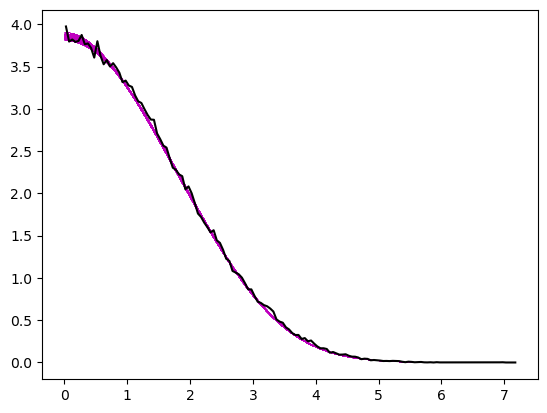

In [53]:
# now plot the new data 
for i in range(len(bcs)):    
    plt.scatter(zsparse,bcs[i],s=0.1,lw=0.1,c='m')
plt.plot(z,concentration_profiles[0],'k')
plt.show()

In [54]:
# compute the correlation coefficients
stdparam = np.std(bparams,axis=0)
mxy = np.outer(stdparam,stdparam) #<x><y>
covparam = np.cov(bparams.T,ddof=0) # <xy>
#print(covparam)
covcorr = covparam/mxy
print(covcorr)

[[ 1.         -0.86990599  0.7667801 ]
 [-0.86990599  1.         -0.97285719]
 [ 0.7667801  -0.97285719  1.        ]]


Note that parameters are highly correlated, as you can see by the correlation matrix  - there are multiple parameters that give essentially the same result. It may be a 2 parameter fit is enough!  Bootstrapping over osmotic coefficients should give less noisy results.

Parma 0 = 2.5284626496743576 +/- 0.41286748480592633


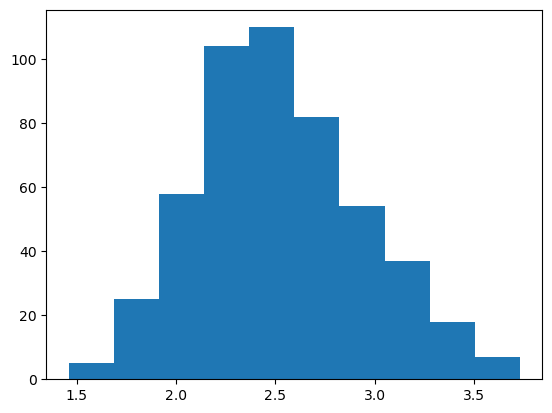

Parma 1 = 0.2246605816551637 +/- 0.02448290473144315


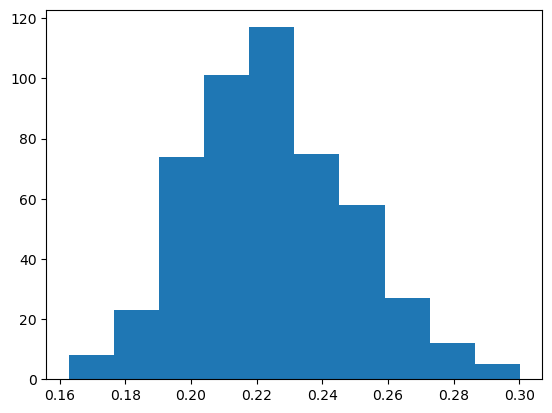

Parma 2 = -0.020767686509418376 +/- 0.003922882824060099


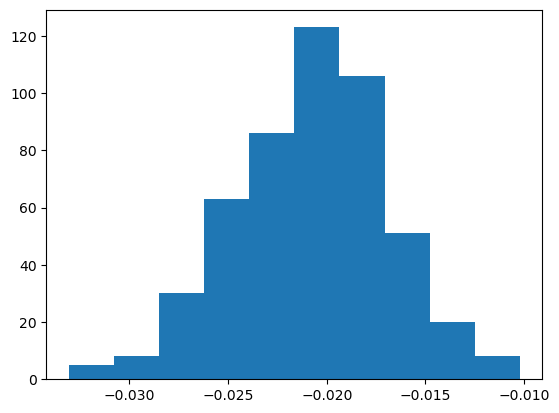

In [55]:
for i in range(len(bparams[0,:])):
    pd = bparams[:,i]
    std_param = np.std(pd) 
    mean_param = np.mean(pd)  # it's actually more accurate to
                             # just use the single fits, but we don't 
                             # necessarily know the name of that results structure
                             # when we are at this point in the code, use the mean for now
    print(f"Parma {i} = {mean_param} +/- {std_param}")
    plt.hist(pd)
    plt.show()

Note that the standard deviations of the parameters are lower with the maximum likelihood approximation.

B: 
weighted: 1.33 +/- 0.65
ML: 2.54 +/- 0.44

$\alpha_1$: 
weighted: 0.357 +/- 0.127
ML: 0.223 +/- 0.025

$\alpha_2$: 
weighted: -0.0317 +/- 0.0102
ML:  -0.0205 +/- 0.0041

Note that it is OK that the uncertainties are not within each other, since this is a highly correlated problem, so there are multiple solutions - small change in optimization can lead to large changes in the parameters while still being relatively close. 

In [56]:
def osmotic_pressure(cs,params, nu=2):
    # takes in a concentration, model parameters and nu. 
    term1 = cs
    term2 = params[1]*0.5*cs**2
    term3 = params[2]*(1/3.0)*cs**3
    csh = np.sqrt(cs)
    B = params[0]
    Bf = 1+B*csh
    term4 = (A/B**2)*((2/B)*np.log(Bf) - (2*csh+B*cs)/Bf)    
    p = nu*R*T*(term1+term2+term3+term4)
    ip = nu*R*T*cs  # this should be the ideal osmotic pressure
    return p,p/ip

In [57]:
op1m=osmotic_pressure(0.98,bparams)

In [58]:
op1m

(array([12685.80390975,  4231.54515666,  2471.30909047]),
 array([2.5948155 , 0.86554065, 0.50549348]))

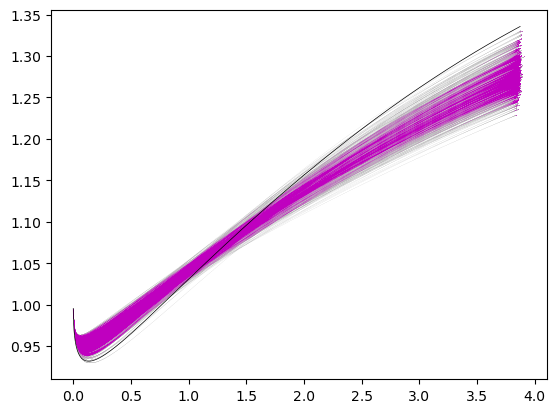

In [59]:
# scatter plots of the osmotic coefficients and osmotic pressures
ops = list()
ocs = list()
for p,c in zip(bparams,bcs):
    op,oc = osmotic_pressure(c,p)
    plt.scatter(c,oc,s=0.1,lw=0.1,alpha=0.01,c='m')
    ops.append(op)
    ocs.append(oc)
opt_oc = osmotic_pressure(c_opt_sparse,full_opt)[1]
plt.plot(c_opt_sparse,opt_oc,'k',lw=0.5,)
ops = np.array(ops)
ocs = np.array(ocs)
plt.show()

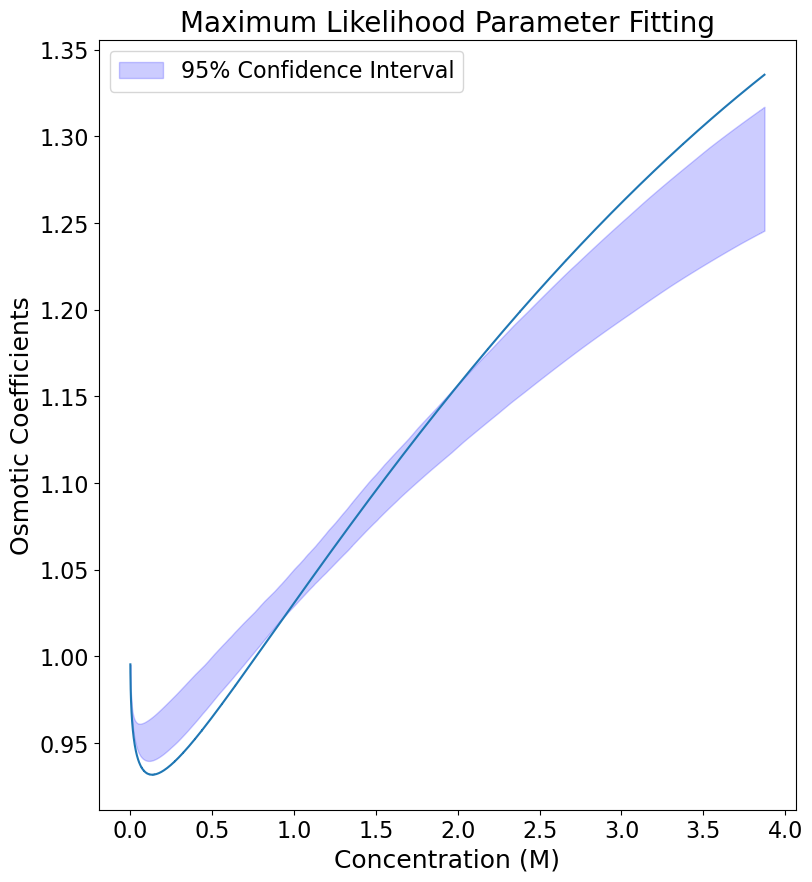

In [60]:
lower_bound = np.percentile(ocs, 2.5, axis=0)
upper_bound = np.percentile(ocs, 97.5, axis=0)
# Plotting the results
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(9.0,10.0))
plt.plot(c_opt_sparse, opt_oc)
plt.fill_between(c_opt_sparse, lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xlabel("Concentration (M)", fontsize=MEDIUM_SIZE)
plt.ylabel('Osmotic Coefficients', fontsize=MEDIUM_SIZE)
plt.legend()
plt.title('Maximum Likelihood Parameter Fitting', fontsize=BIGGER_SIZE)
plt.savefig('oc.png', dpi=1000)
plt.show()


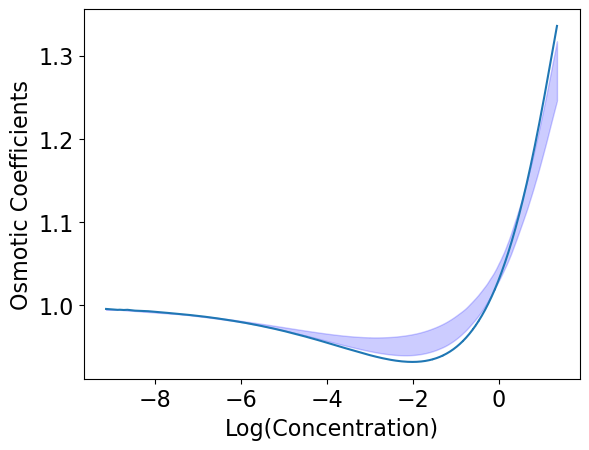

In [61]:
plt.plot(np.log(c_opt_sparse), opt_oc)
plt.fill_between(np.log(c_opt_sparse), lower_bound, upper_bound, color='b', alpha=0.2, label='95% Confidence Interval')
plt.xlabel('Log(Concentration)')
plt.ylabel('Osmotic Coefficients')
plt.show()

How can I extract the osmotic values at each concentration?